# CMRM Homework Assignment No. 1

In [2]:
import os
import numpy as np 
import pandas as pd # pip install pandas
import scipy
import matplotlib.pyplot as plt
import librosa
import sklearn # pip install sklearn
from tqdm import tqdm
import joblib
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import random
from scipy.signal import resample


In [3]:
df = pd.read_csv('mitbih_train.csv')
df2 = pd.read_csv('mitbih_test.csv')

# Verificar las formas del dataset
print(f"Shape of train dataset: {df.shape}")  # Debe coincidir con (87553, 188)
print(f"Shape of test dataset: {df2.shape}")  # Debe coincidir con (21891, 188)

Shape of train dataset: (87553, 188)
Shape of test dataset: (21891, 188)


## Question 1

In [4]:
# Load .csv files

df = pd.read_csv("mitbih_train.csv")
df2 = pd.read_csv("mitbih_test.csv")

# Shape of datasets
print("Train dataset shape:", df.shape)
print("Test dataset shape:", df2.shape)

# Unique classes in data Sets
classes_train = df.iloc[:, -1].unique()
classes_test = df2.iloc[:, -1].unique()
print("Classes in train dataset:", classes_train)
print("Classes in test dataset:", classes_test)

# DICTIONARY DEF --> maps numeric keys to short labels for arrhythmia types
label_names = {
    0: 'N',  # Normal
    1: 'S',  # Supraventricular ectopic beat
    2: 'V',  # Premature ventricular contraction
    3: 'F',  # Fusion of ventricular and normal
    4: 'Q'   # Unknown beat type
}

# Print the dictionary
print("Label Names Dictionary:")
for key, value in label_names.items():
    print(f"Class {key}: {value}")

Train dataset shape: (87553, 188)
Test dataset shape: (21891, 188)
Classes in train dataset: [0. 1. 2. 3. 4.]
Classes in test dataset: [0. 1. 2. 3. 4.]
Label Names Dictionary:
Class 0: N
Class 1: S
Class 2: V
Class 3: F
Class 4: Q


Rows (Items): heartbeats (data points).
Columns (Features): features per heartbeat.

Features (First 187 Columns): These columns represent the ECG signal values for each heartbeat.
Label (Last Column): The 188th column represents the class label of the heartbeat.

In [8]:
# Take a look at the dataset distribution

# Train dataset - distribution des classes
train_class_distribution = df.iloc[:, -1].value_counts().sort_index()
print("\nClass distribution in train dataset:")
print(train_class_counts)

# Test dataset - distribution des classes
test_class_distribution = df2.iloc[:, -1].value_counts().sort_index()
print("\nClass distribution in test dataset:")
print(test_class_counts)



Class distribution in train dataset:
0.000000000000000000e+00.88
0.0    72470
1.0     2223
2.0     5788
3.0      641
4.0     6431
Name: count, dtype: int64

Class distribution in test dataset:
0.000000000000000000e+00.65
0.0    18117
1.0      556
2.0     1448
3.0      162
4.0     1608
Name: count, dtype: int64


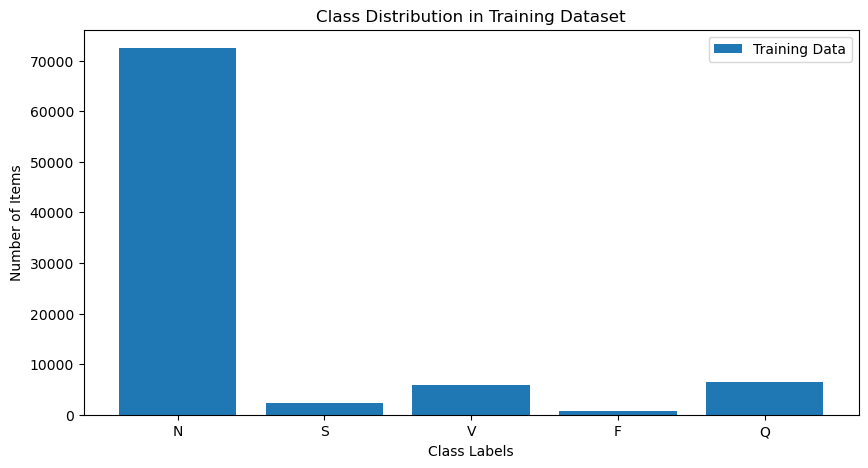

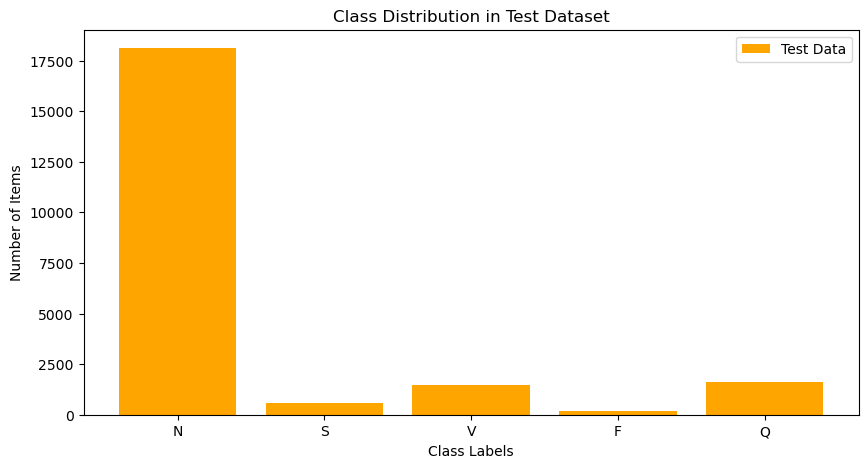

In [9]:
# Map the numeric labels to their corresponding names using label_names
train_labels = [label_names[label] for label in train_class_distribution.index]  # Map training labels
test_labels = [label_names[label] for label in test_class_distribution.index]  # Map test labels

# Bar plot for training dataset
plt.figure(figsize=(10, 5))
plt.bar(train_labels, train_class_distribution.values, label='Training Data')
plt.title("Class Distribution in Training Dataset")
plt.xlabel("Class Labels")
plt.ylabel("Number of Items")
plt.legend()
plt.show()

# Bar plot for test dataset
plt.figure(figsize=(10, 5))
plt.bar(test_labels, test_class_distribution.values, color='orange', label='Test Data')
plt.title("Class Distribution in Test Dataset")
plt.xlabel("Class Labels")
plt.ylabel("Number of Items")
plt.legend()
plt.show()


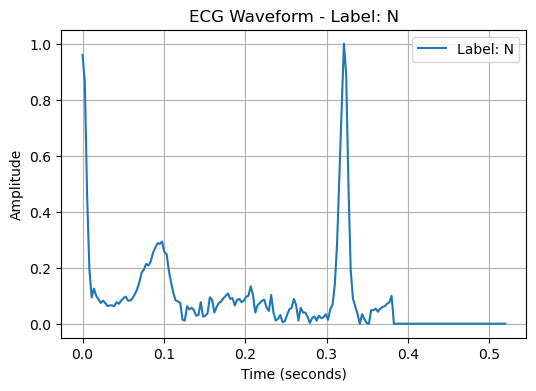

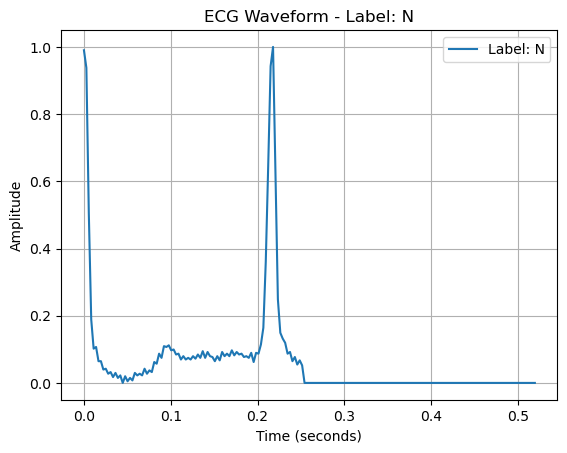

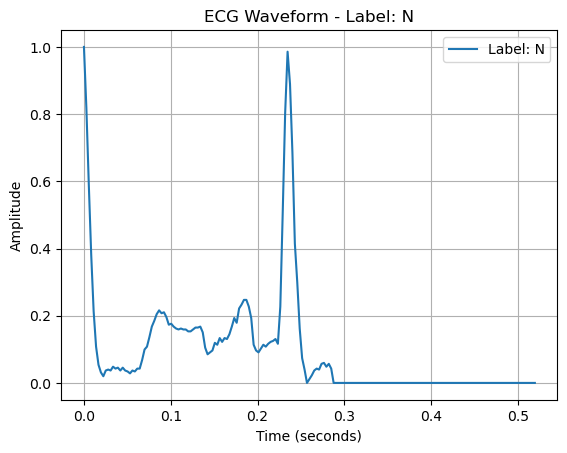

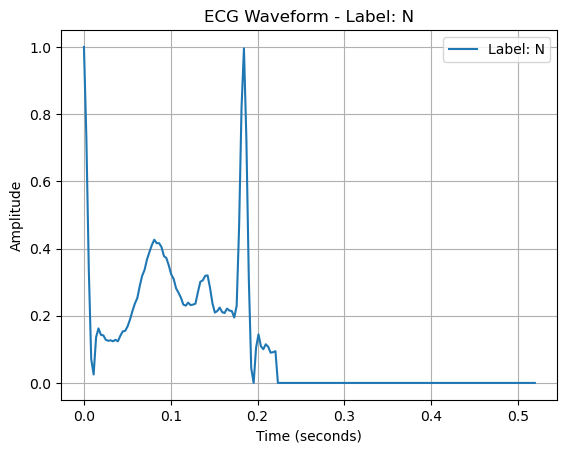

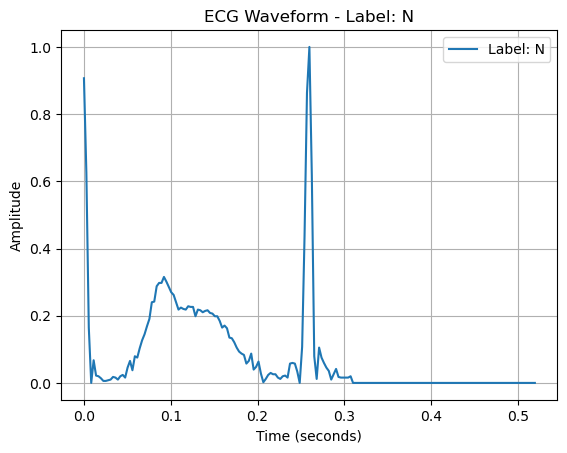

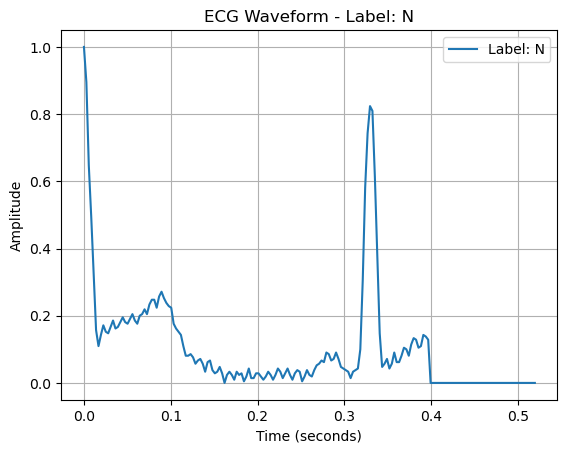

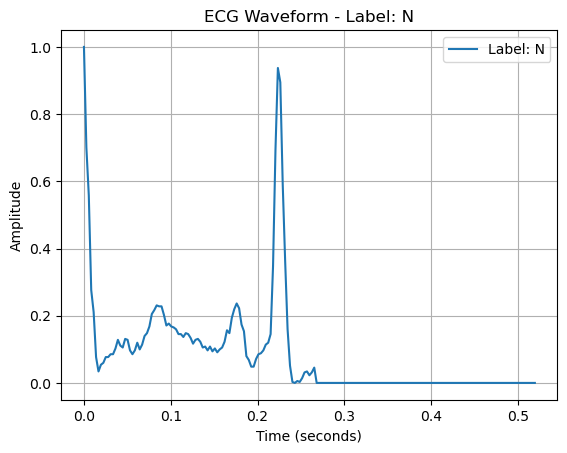

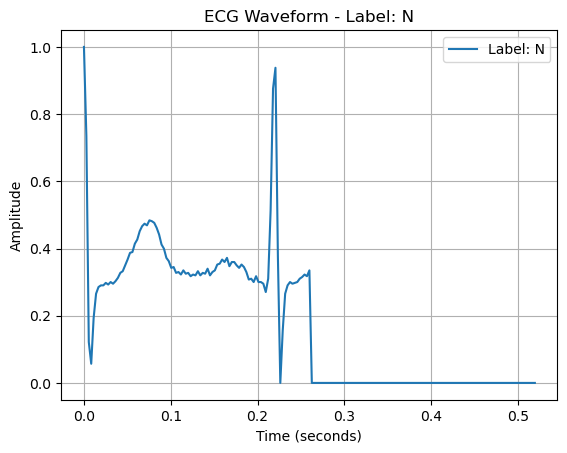

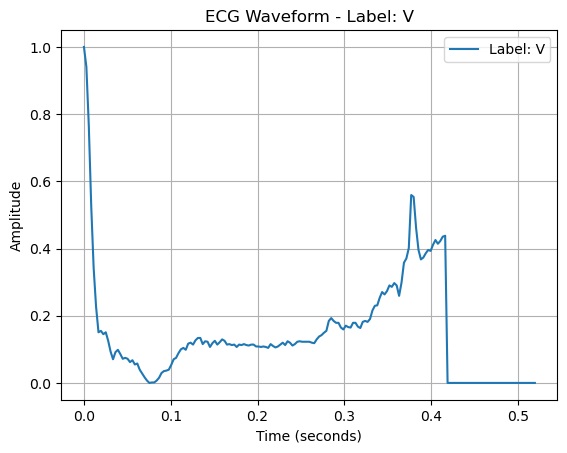

In [10]:
# Define the sample rate
Fs = 360  # 360 Hz (muestras por segundo)

# Definir the ranges
first = 0  # First index
last = len(df)  # Final index (total number of signals in the training set)

# Create a time vector (187 samples per signal, sample rate = 360 Hz)
time = np.linspace(0, 187 / Fs, 187)

# Plot signals in the specified range
plt.figure(figsize=(6, 4))
for i in range(first, last, 10000):  # Cada 10,000 señales
    plt.plot(time, df.iloc[i, :-1], label=f"Label: {label_names[df.iloc[i, -1]]}")
    plt.title(f"ECG Waveform - Label: {label_names[df.iloc[i, -1]]}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()


Shape of train_df: (8755, 188)
Shape of test_df: (2189, 188)
Class distribution in train_df:
0.000000000000000000e+00.88
0.0    7240
1.0     201
2.0     622
3.0      57
4.0     635
Name: count, dtype: int64

Class distribution in test_df:
0.000000000000000000e+00.65
0.0    1796
1.0      62
2.0     153
3.0      21
4.0     157
Name: count, dtype: int64


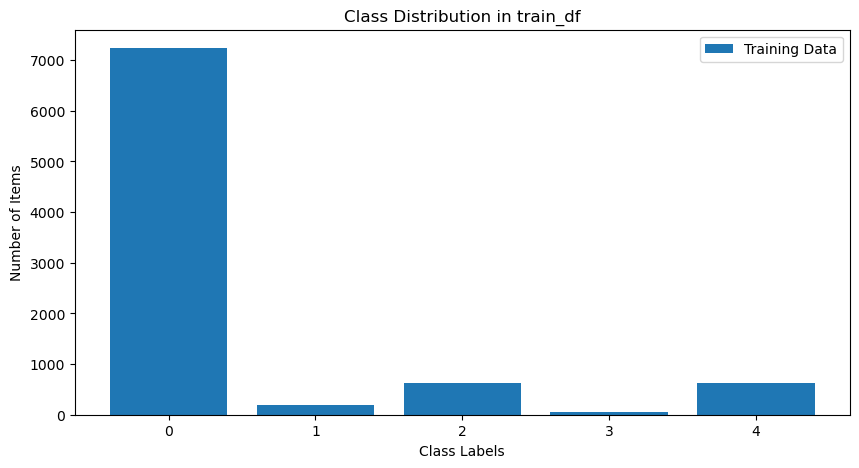

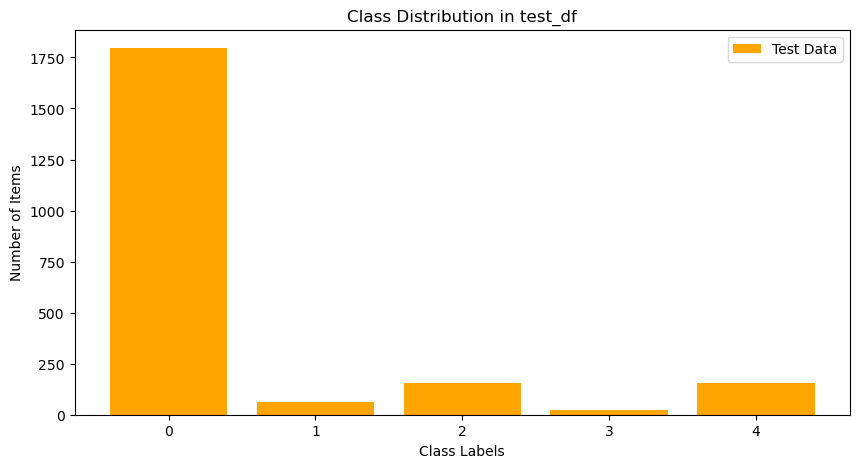

Shape of train_df (features only): (8755, 187)
Shape of test_df (features only): (2189, 187)
Shape of labels_train: 8755
Shape of labels_test: 2189


In [11]:
# Extract a subset of the dataset
from sklearn.model_selection import train_test_split

# Subsample training dataset
train_df, _ = train_test_split(
    df, 
    train_size=0.1,  # Retain only 10% of the training set
    random_state=28  # Reproducibility
)

# Subsample test dataset
test_df, _ = train_test_split(
    df2, 
    train_size=0.1,  # Retain only 10% of the test set
    random_state=5  # Reproducibility
)

# Print the shapes of the new DataFrames
print(f"Shape of train_df: {train_df.shape}")  # Should be (8755, 188)
print(f"Shape of test_df: {test_df.shape}")  # Should be (2189, 188) 

# Distribution of classes in the undersampled DataFrames
train_class_distribution = train_df.iloc[:, -1].value_counts().sort_index()
test_class_distribution = test_df.iloc[:, -1].value_counts().sort_index()

print("Class distribution in train_df:")
print(train_class_distribution)

print("\nClass distribution in test_df:")
print(test_class_distribution)

# Plot distributions
# Training
plt.figure(figsize=(10, 5))
plt.bar(train_class_distribution.index, train_class_distribution.values, label="Training Data")
plt.title("Class Distribution in train_df")
plt.xlabel("Class Labels")
plt.ylabel("Number of Items")
plt.legend()
plt.show()

# Test
plt.figure(figsize=(10, 5))
plt.bar(test_class_distribution.index, test_class_distribution.values, label="Test Data", color="orange")
plt.title("Class Distribution in test_df")
plt.xlabel("Class Labels")
plt.ylabel("Number of Items")
plt.legend()
plt.show()

# Define label lists and data numpy arrays
# Separate tags and features
labels_train = train_df.iloc[:, -1].tolist()  # Last column as list
labels_test = test_df.iloc[:, -1].tolist()  # Last column as list

train_df = train_df.iloc[:, :-1]  # All columns except the last one
test_df = test_df.iloc[:, :-1]  # All columns except the last one

# Print the final shapes
print(f"Shape of train_df (features only): {train_df.shape}")  # Should be (8755, 187)
print(f"Shape of test_df (features only): {test_df.shape}")  # Should be (2189, 187)
print(f"Shape of labels_train: {len(labels_train)}")  # Should be 8755
print(f"Shape of labels_test: {len(labels_test)}")  # Should be 2189

## Question 2

Length of train_list: 8755
Length of test_list: 2189
First curve before scaling (train_list): [0.9502762556076048, 0.8950276374816895, 0.4125230312347412, 0.05156537890434265, 0.034990791231393814, 0.08103130757808685, 0.09392265230417252, 0.08471454679965973, 0.07918968796730042, 0.07734806835651396, 0.07734806835651396, 0.08287292718887329, 0.07550644874572755, 0.06629834324121475, 0.06445672363042831, 0.06813996285200119, 0.0589318610727787, 0.04604051634669304, 0.04235727339982986, 0.04051565378904343, 0.034990791231393814, 0.027624309062957764, 0.016574585810303688, 0.01841620542109013, 0.007366482634097338, 0.003683241317048669, 0.0018416206585243344, 0.0018416206585243344, 0.0, 0.005524862091988325, 0.020257826894521717, 0.03130755200982094, 0.04604051634669304, 0.06077348068356513, 0.08471454679965973, 0.11049723625183104, 0.12338858097791672, 0.12338858097791672, 0.13075506687164307, 0.1381215453147888, 0.13996316492557523, 0.13627992570400238, 0.13996316492557523, 0.139963164

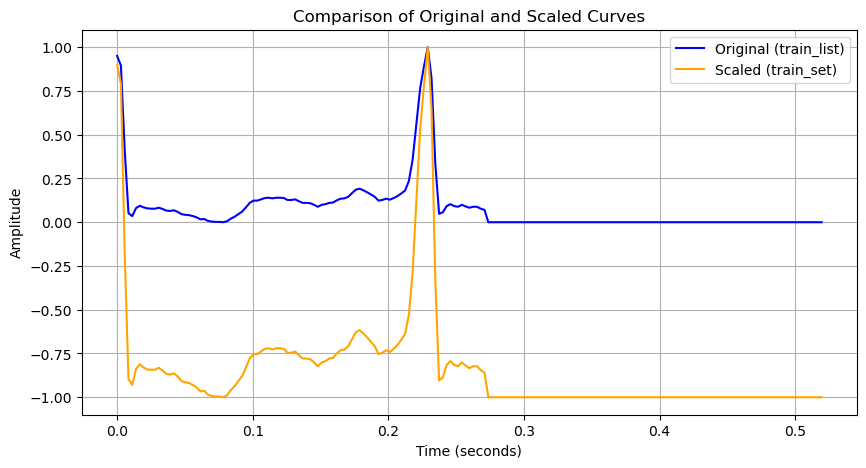

In [12]:
# Preprocessing
train_list = train_df.values.tolist() 
test_list = test_df.values.tolist() 

print(f"Length of train_list: {len(train_list)}")  # Should be 8755
print(f"Length of test_list: {len(test_list)}")  # Should be 2189

# Plot
from sklearn.preprocessing import MinMaxScaler
# Define the scaler with the range(-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Preprocess the training set
train_set = scaler.fit_transform(train_list)  # Ajustar y transformar el conjunto de entrenamiento

# Preprocess the test set
test_set = scaler.transform(test_list)  # Solo transformar usando el escalador ajustado al conjunto de entrenamiento

# Verify the transformation
print(f"First curve before scaling (train_list): {train_list[0]}")
print(f"First curve after scaling (train_set): {train_set[0]}")

# Plot the first curve of train_list and train_set
time = np.linspace(0, 187 / 360, 187)  # Time vector for the 187 samples

plt.figure(figsize=(10, 5))
plt.plot(time, train_list[0], label="Original (train_list)", color='blue')
plt.plot(time, train_set[0], label="Scaled (train_set)", color='orange')
plt.title("Comparison of Original and Scaled Curves")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
def compute_feature_vector(x, Fs, N=64, H=16):
    """Compute the feature vector 

    Args:
        x: Input signal
        Fs: Sampling rate
        N: Window length
        H: Hop size

    Returns:
        f_vector: Feature vector
    """
    
    # Ensure x is a NumPy array
    x = np.array(x)
    
    # Compute standard deviation and mean of the ECG waveform
    std_dev = np.std(x)
    mean_val = np.mean(x)
    
    # Compute zero-crossing rate
    zero_crossings = librosa.feature.zero_crossing_rate(x, frame_length=N, hop_length=H)[0]
    
    # Compute standard deviation and mean of the zero-crossing rate
    zcr_std = np.std(zero_crossings)
    zcr_mean = np.mean(zero_crossings)
    
    # Compute the STFT
    stft_result = librosa.stft(x, n_fft=N, hop_length=H)
    C = np.abs(stft_result)
    
    # Compute spectral flux
    spectral_flux = librosa.onset.onset_strength(S=librosa.amplitude_to_db(C, ref=np.max), sr=Fs)
    
    # Compute standard deviation and mean of the spectral flux
    flux_std = np.std(spectral_flux)
    flux_mean = np.mean(spectral_flux)
    
    # Concatenate all the features into the feature vector
    f_vector = np.concatenate([
        [std_dev, mean_val, zcr_std, zcr_mean, flux_std, flux_mean],
        zero_crossings, 
        spectral_flux
    ])
    
    return f_vector

  f_vector = np.concatenate([
        [std_dev, mean_val],  # Standard deviation and mean of ECG
        [zcr_std, zcr_mean],  # Standard deviation and mean of ZCR
        [flux_std, flux_mean] # Standard deviation and mean of spectral flux
    ])

list of the f_vector for the first waveform from the training_set:
[ 3.34698180e-01 -8.34808193e-01  1.18625437e-02  1.43229167e-02
  4.16254600e+00  2.21041310e+00  1.56250000e-02  1.56250000e-02
  1.56250000e-02  1.56250000e-02  3.12500000e-02  3.12500000e-02
  3.12500000e-02  1.56250000e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.72712464e-01  3.41197034e-02  2.24358518e+00
  1.42291737e+01  7.38123474e+00  2.09786380e+00  1.60479947e-01
  5.78484849e-03  2.77177120e-06]


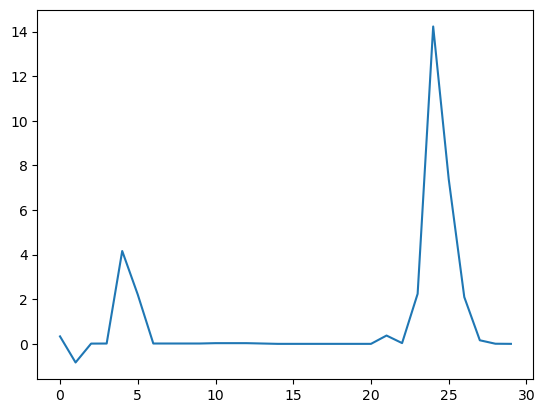

In [14]:
# Test compute_feature_vector
print("list of the f_vector for the first waveform from the training_set:")
print(compute_feature_vector(train_set[0],Fs))

# Plot
plt.plot(compute_feature_vector(train_set[0],Fs))

Feature Vector for the First Training Signal: [ 0.16735013  0.08256763  0.          0.          4.26949946  2.19501699
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          2.50307296
 14.4707602   7.62290491  1.6666894   0.07677642  0.          0.        ]


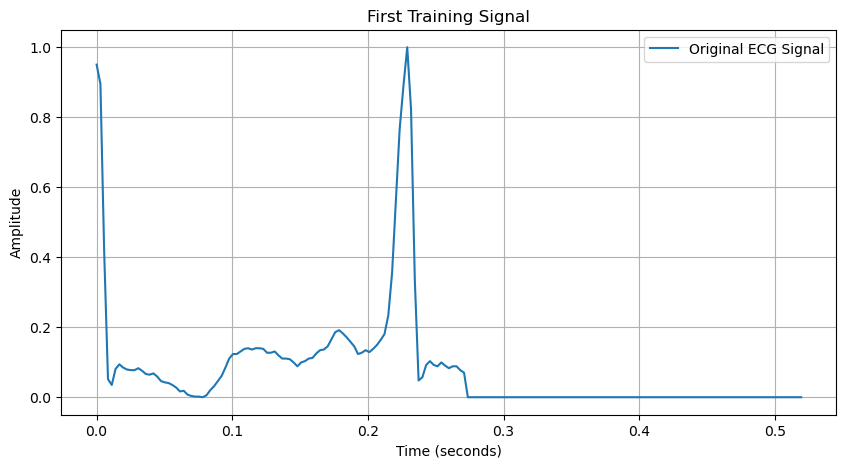

Processing Training Set...


Training Set: 100%|████████████████████████| 8755/8755 [00:11<00:00, 740.76it/s]


Processing Test Set...


Test Set: 100%|████████████████████████████| 2189/2189 [00:03<00:00, 727.48it/s]

Shape of train_fvector: 8755 x 30
Shape of test_fvector: 2189 x 30


In [15]:
# Test the function with the first signal in the training set
first_train_signal = train_list[0]
first_f_vector = compute_feature_vector(first_train_signal, Fs=360, N=64, H=16)

print("Feature Vector for the First Training Signal:", first_f_vector)

# Plot the original signal
time = np.linspace(0, len(first_train_signal) / 360, len(first_train_signal))
plt.figure(figsize=(10, 5))
plt.plot(time, first_train_signal, label="Original ECG Signal")
plt.title("First Training Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Calculate the feature vectors for the entire set
train_fvector = []  # List to store the feature vectors of the training set
test_fvector = []  # List for test set

# Process training set with progress bar
print("Processing Training Set...")
for signal in tqdm(train_list, desc="Training Set"):
    train_fvector.append(compute_feature_vector(signal, Fs=360, N=64, H=16))

# Process test set with progress bar
print("Processing Test Set...")
for signal in tqdm(test_list, desc="Test Set"):
    test_fvector.append(compute_feature_vector(signal, Fs=360, N=64, H=16))

# Check list shapes
print(f"Shape of train_fvector: {len(train_fvector)} x {len(train_fvector[0])}")  # Ejemplo: (8755, 6)
print(f"Shape of test_fvector: {len(test_fvector)} x {len(test_fvector[0])}")  # Ejemplo: (2189, 6)

## Question 3

In [16]:
N=64
H=16

# Ensure that the labels are integers
labels_train = np.array(labels_train).astype(int)
labels_test = np.array(labels_test).astype(int)

# Define
C = 10
kernel = 'rbf'
svm_model = SVC(C=C, kernel=kernel, random_state=42)

# Train the model
svm_model.fit(train_fvector, labels_train)

print("Unique classes in labels_train:", np.unique(labels_train))
print("Unique classes in labels_test:", np.unique(labels_test))

# Save the model
# Make sure the directory exists
os.makedirs("my_model", exist_ok=True)

model_filename = f"my_model/svc_{kernel}_C_{C}_N_{N}_H_{H}.joblib"
joblib.dump(svm_model, model_filename)
print(f"Model saved as {model_filename}")

# Evaluate the model
# Prediction on the training set
train_predictions = svm_model.predict(train_fvector)

# Accuracy on the training set
train_accuracy = accuracy_score(labels_train, train_predictions)

Unique classes in labels_train: [0 1 2 3 4]
Unique classes in labels_test: [0 1 2 3 4]
Model saved as my_model/svc_rbf_C_10_N_64_H_16.joblib


In [17]:
# Print the accuracy on the training set
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


Training Accuracy: 88.27%


In [ ]:
# Classify the test set
# Classification report on test set
test_predictions = svm_model.predict(test_fvector)
test_accuracy = accuracy_score(labels_test, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 87.35%


Test Classification Report:
              precision    recall  f1-score   support

           N       0.87      0.99      0.93      1796
           S       0.00      0.00      0.00        62
           V       0.83      0.29      0.43       153
           F       0.00      0.00      0.00        21
           Q       0.90      0.55      0.68       157

    accuracy                           0.87      2189
   macro avg       0.52      0.37      0.41      2189
weighted avg       0.84      0.87      0.84      2189

Test Accuracy: 87.35%


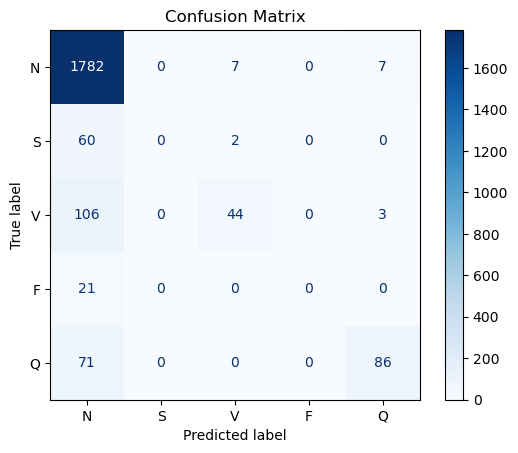

In [19]:
# Print the accuracy
print("Test Classification Report:")
print(classification_report(labels_test, test_predictions, target_names=list(label_names.values()), zero_division=0))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# Plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confussion Matrix
cm = confusion_matrix(labels_test, test_predictions)

# Plot the confussion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_names.values()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [21]:
# Classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(labels_test, test_predictions, target_names=list(label_names.values()), zero_division=0))

for i, label in enumerate(label_names.values()):
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    tn = cm.sum() - (tp + fp + fn)
    print(f"Class {label} -> TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")


Classification Report:
              precision    recall  f1-score   support

           N       0.87      0.99      0.93      1796
           S       0.00      0.00      0.00        62
           V       0.83      0.29      0.43       153
           F       0.00      0.00      0.00        21
           Q       0.90      0.55      0.68       157

    accuracy                           0.87      2189
   macro avg       0.52      0.37      0.41      2189
weighted avg       0.84      0.87      0.84      2189

Class N -> TP: 1782, FP: 258, FN: 14, TN: 135
Class S -> TP: 0, FP: 0, FN: 62, TN: 2127
Class V -> TP: 44, FP: 9, FN: 109, TN: 2027
Class F -> TP: 0, FP: 0, FN: 21, TN: 2168
Class Q -> TP: 86, FP: 10, FN: 71, TN: 2022


## Question 4

In [23]:
# Create a balanced DataFrame for training
train_df = pd.DataFrame()  # Inicializar un DataFrame vacío

# Extract 641 samples per class from the original set (df)
for label in df.iloc[:, -1].unique():  # Iterate over unique classes
    train_df = pd.concat([
        train_df, 
        df.loc[df.iloc[:, -1] == label].sample(641, random_state=42)
    ], ignore_index=True)

# Check the shape of the new training DataFrame
print(f"Shape of balanced train_df: {train_df.shape}")  # Should be (3205, 188)

# Create a balanced DataFrame for the test set
test_df = pd.DataFrame()  # Initialize an empty DataFrame

# Extract 162 samples per class from the original set (df2)
for label in df2.iloc[:, -1].unique():  # Iterate over unique classes
    test_df = pd.concat([
        test_df, 
        df2.loc[df2.iloc[:, -1] == label].sample(162, random_state=42)
    ], ignore_index=True)

# Verify the shape of the new test DataFrame
print(f"Shape of balanced test_df: {test_df.shape}")  # Should be (810, 188)

# Convert the balanced DataFrames Values to Lists
train_list = train_df.iloc[:, :-1].values.tolist()  # Training Features
labels_train = train_df.iloc[:, -1].astype(int).tolist()  # Training labels

test_list = test_df.iloc[:, :-1].values.tolist()  # Test Features
labels_test = test_df.iloc[:, -1].astype(int).tolist()  # Test labels

# Check conversions
print(f"Length of train_list: {len(train_list)}")  # Should be 3205
print(f"Length of labels_train: {len(labels_train)}")  # Should be 3205
print(f"Length of test_list: {len(test_list)}")  # Should be 810
print(f"Length of labels_test: {len(labels_test)}")  # Should be 810


Shape of balanced train_df: (3205, 188)
Shape of balanced test_df: (810, 188)
Length of train_list: 3205
Length of labels_train: 3205
Length of test_list: 810
Length of labels_test: 810


In [24]:
# Define Augmentation class

class augment():
    
    def __init__(self):
        pass
    
    def stretch(self, x):
        """
        Perform stretching transformation on the signal.

        Args:
            x (numpy array): Original signal.

        Returns:
            y1 (numpy array): Transformed signal with length adjusted to 187 samples.
        """
        # Make sure the signal is a NumPy array
        x = np.array(x)
        
        # Calculate the new number of samples (l)
        beta = random.random()  # Aleatory number in [0, 1]
        # Calculate length, make sure it is valid
        l = int(187 * (1 + (beta - 0.5)/3))  
        
        # Resample the signal to have l samples
        y = resample(x, l)

        # Adjust the signal so that it has exactly 187 samples
        y = scipy.signal.resample(x, l)
        y1 = np.zeros(187)
        if l < 187:
            y1[:l] = y
        else:
            y1[:187] = y[:187]
        return y1

        
    def amplify(self, x):
        """
        Perform amplification transformation on the signal.

        Args:
            x (numpy array): Original signal.

        Returns:
            numpy array: amplified signal.
        """
        x = np.array(x)
        # Generate a random amplification factor (α)
        alpha = random.uniform(-0.5, 0.5)  # Aleatory number in [-0.5, 0.5]

        # Scale the signal by (α + 1)
        return x * (alpha + 1)
             
    def perform(self, x):
        """
        Randomly applies augmentations (stretch, amplify or none) to the signal.

        Args:
            x (numpy array): Original signal.

        Returns:
            x (numpy array): Transformed signal.
            performed_augmentations (list): List of applied augmentations.
        """
        x = np.array(x)
        performed_augmentations = []  # Variable to track augmentations performed

        # Conditional to apply stretching
        if np.random.binomial(1, 0.5) == 1:
            x = self.stretch(x)
            performed_augmentations.append("stretch")

        # Conditional to apply amplification
        if np.random.binomial(1, 0.5) == 1:
            x = self.amplify(x)
            performed_augmentations.append("amplify")

        return x, performed_augmentations



In [71]:
# New datasets
# Instantiate the augment class
augmenter = augment()

# Train
# Select the first signal from train_list (without modifying the labels)
original_signal = train_list[0]  # First signal of the training set

# Apply augmentations
augmented_signal, performed_augmentations = augmenter.perform(original_signal)

# Print the applied augmentations
print(f"Performed Augmentations: {performed_augmentations}")

# Test    

Performed Augmentations: ['stretch']


Run 1 - Performed Augmentations: ['amplify']
Run 2 - Performed Augmentations: ['stretch', 'amplify']
Run 3 - Performed Augmentations: ['stretch']


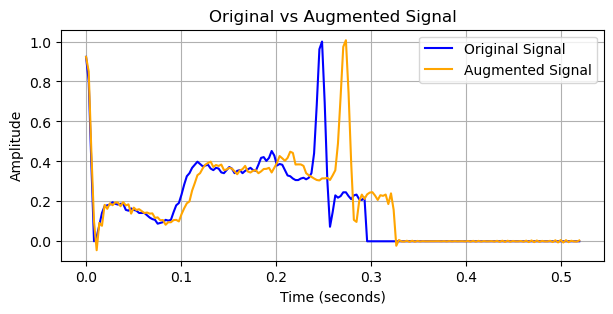

In [80]:
# Test augment class
# Repeat several times to test randomness
for i in range(3):  # Repeat tree times
    augmented_signal, performed_augmentations = augmenter.perform(original_signal)
    print(f"Run {i+1} - Performed Augmentations: {performed_augmentations}")

# Plot
time = np.linspace(0, len(original_signal) / 360, len(original_signal))  # Time vector

plt.figure(figsize=(7, 3))
plt.plot(time, original_signal, label="Original Signal", color="blue")
plt.plot(time, augmented_signal, label="Augmented Signal", color="orange")
plt.title("Original vs Augmented Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [81]:
# Augment the train dataset
n_aug = 100

In [82]:
# Preprocessing

# Create a DataFrame for the balanced set with augmentations
augmented_train_df = train_df.copy()

# Apply augmentations by class
for label in train_df.iloc[:, -1].unique():  # Iterate over unique classes
    # Select n_aug elements from current class
    sampled_items = df.loc[df.iloc[:, -1] == label].sample(n=n_aug, random_state=16)
    
    # Apply augmentations to each selected element
    for i in range(n_aug):
        # Extract signal without labels (without last column)
        original_signal = sampled_items.iloc[i, :-1].values
        augmented_signal, _ = augmenter.perform(original_signal)
        
        # Concatenate the tag to the augmented signal
        augmented_row = np.append(augmented_signal, label)  # Augmented sign + label
        
        # Convert to a DataFrame and concatenate
        augmented_train_df = pd.concat([
            augmented_train_df,
            pd.DataFrame([augmented_row], columns=augmented_train_df.columns)
        ], ignore_index=True)

In [83]:
# Count the values for each class
# Check counts by DataFrame class and shape
class_counts = augmented_train_df.iloc[:, -1].value_counts().sort_index()
print(f"Class Counts After Augmentation:\n{class_counts}")
print(f"Shape of augmented_train_df: {augmented_train_df.shape}")  # Should be (3705, 188)

# Train
# Paso 6: Convertir los DataFrames a listas
train_list = augmented_train_df.iloc[:, :-1].values.tolist()  # Remove last column
labels_train = augmented_train_df.iloc[:, -1].astype(int).tolist()  # Extract tags


# Test
test_list = test_df.iloc[:, :-1].values.tolist()  # Remove last column
labels_test = test_df.iloc[:, -1].astype(int).tolist()  # Extract tags



Class Counts After Augmentation:
0.000000000000000000e+00.88
0.0    741
1.0    741
2.0    741
3.0    741
4.0    741
Name: count, dtype: int64
Shape of augmented_train_df: (3705, 188)


In [84]:
# Normalize using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
train_set = scaler.fit_transform(train_list)
test_set = scaler.transform(test_list)

# Print final forms
print(f"Shape of normalized train_set: {train_set.shape}")  # Should be(3705, 187)
print(f"Shape of normalized test_set: {test_set.shape}")  # Depends from test_df, (810, ...)


Shape of normalized train_set: (3705, 187)
Shape of normalized test_set: (810, 187)


## Question 5

In [85]:
# Compute feature vector for both training and test sets

N = 64
H = 16
Fs = 360

# Train
train_fvector = [compute_feature_vector(row, Fs=360, N=64, H=16) for row in train_set]

# Test
test_fvector = [compute_feature_vector(row, Fs=360, N=64, H=16) for row in test_set]

# Confirmar formas
print(f"Shape of train_fvector: {len(train_fvector)} x {len(train_fvector[0])}")
print(f"Shape of test_fvector: {len(test_fvector)} x {len(test_fvector[0])}")

Shape of train_fvector: 3705 x 30
Shape of test_fvector: 810 x 30


In [86]:
kernel = 'rbf'
C = 10

svm_model = SVC(C=C, kernel=kernel, random_state=42)

# Train SVC
svm_model.fit(train_fvector, labels_train)

# Prediction on the test set
test_predictions = svm_model.predict(test_fvector)


In [87]:
# Accuracy in the training set
train_predictions = svm_model.predict(train_fvector)
train_accuracy = accuracy_score(labels_train, train_predictions)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 74.79%


In [88]:
# Print the accuracy on the training set
test_accuracy = accuracy_score(labels_test, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 71.23%


Classification Report:
              precision    recall  f1-score   support

           N       0.56      0.55      0.55       162
           S       0.75      0.59      0.66       162
           V       0.64      0.64      0.64       162
           F       0.75      0.89      0.82       162
           Q       0.85      0.90      0.87       162

    accuracy                           0.71       810
   macro avg       0.71      0.71      0.71       810
weighted avg       0.71      0.71      0.71       810



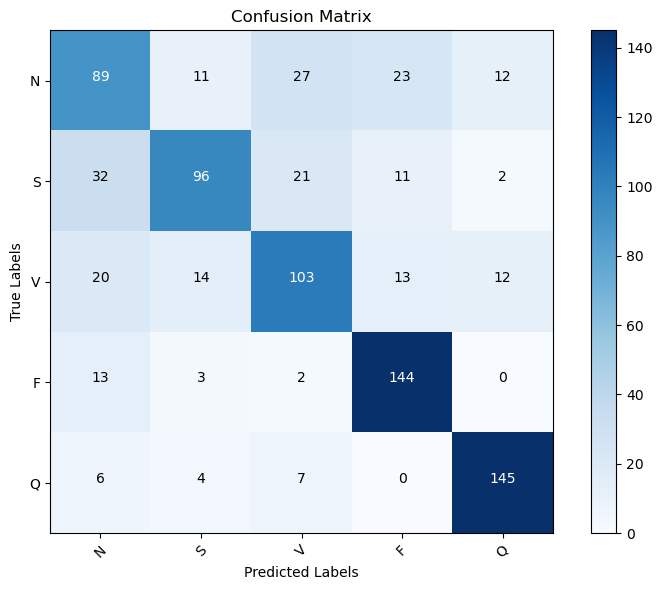

Class 0: {'TP': 89, 'FP': 71, 'FN': 73, 'TN': 577}
Class 1: {'TP': 96, 'FP': 32, 'FN': 66, 'TN': 616}
Class 2: {'TP': 103, 'FP': 57, 'FN': 59, 'TN': 591}
Class 3: {'TP': 144, 'FP': 47, 'FN': 18, 'TN': 601}
Class 4: {'TP': 145, 'FP': 26, 'FN': 17, 'TN': 622}


In [89]:
# Classify the test set
print("Classification Report:")
print(classification_report(labels_test, test_predictions, target_names=list(label_names.values())))


# Plot the confusion matrix
conf_matrix = confusion_matrix(labels_test, test_predictions)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Axis labels
tick_marks = np.arange(len(label_names))
plt.xticks(tick_marks, label_names.values(), rotation=45)
plt.yticks(tick_marks, label_names.values())

# Write down the values in the matrix
thresh = conf_matrix.max() / 2.  # Threshold to change text color
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.tight_layout()
plt.show()

# Function to calculate TP, FP, TN, FN per class
def calculate_metrics_per_class(conf_matrix):
    metrics = {}
    num_classes = conf_matrix.shape[0]
    
    for cls in range(num_classes):
        TP = conf_matrix[cls, cls]
        FP = conf_matrix[:, cls].sum() - TP
        FN = conf_matrix[cls, :].sum() - TP
        TN = conf_matrix.sum() - (TP + FP + FN)
        
        metrics[f'Class {cls}'] = {
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        }
    
    return metrics

# Calculate metrics
conf_matrix = confusion_matrix(labels_test, test_predictions)
metrics = calculate_metrics_per_class(conf_matrix)

# Print metrics per class
for cls, values in metrics.items():
    print(f"{cls}: {values}")


In [92]:
# Classification report
C_values = [0.1, 1, 10, 100, 1000, 10000, 100000]
results = []

for C in C_values:
    # Define the model
    svm_model = SVC(C=C, kernel='rbf', random_state=42)
    svm_model.fit(train_fvector, labels_train)
    
    # Evaluate on test set
    test_predictions = svm_model.predict(test_fvector)
    accuracy = accuracy_score(labels_test, test_predictions)
    
    # Save results
    results.append((C, accuracy))
    print(f"C: {C}, Test Accuracy: {accuracy * 100:.2f}%")

# Convert results in a DataFrame
results_df = pd.DataFrame(results, columns=["C", "Accuracy"])

C: 0.1, Test Accuracy: 61.98%
C: 1, Test Accuracy: 66.54%
C: 10, Test Accuracy: 71.23%
C: 100, Test Accuracy: 75.06%
C: 1000, Test Accuracy: 75.43%
C: 10000, Test Accuracy: 74.07%
C: 100000, Test Accuracy: 72.47%


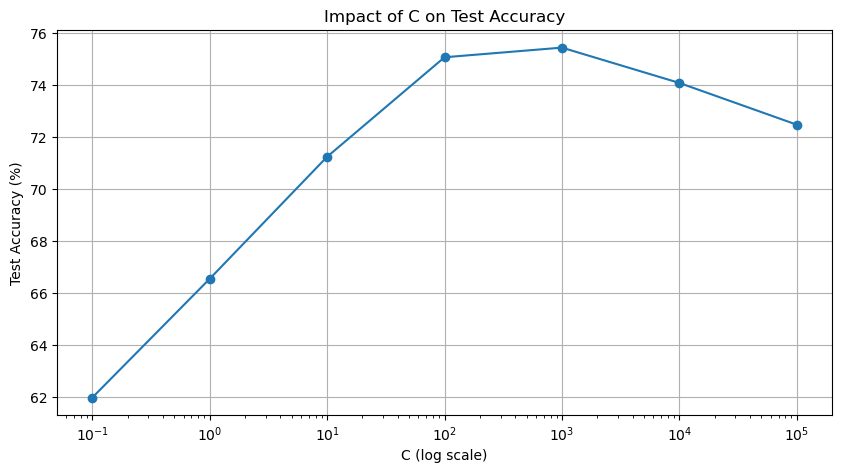

In [93]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(results_df["C"], results_df["Accuracy"] * 100, marker="o")
plt.xscale("log")
plt.title("Impact of C on Test Accuracy")
plt.xlabel("C (log scale)")
plt.ylabel("Test Accuracy (%)")
plt.grid(True)
plt.show()

In [98]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results_kernels = []

for kernel in kernels:
    svm_model = SVC(C=1000, kernel=kernel, random_state=42)
    svm_model.fit(train_fvector, labels_train)
    
    test_predictions = svm_model.predict(test_fvector)
    accuracy = accuracy_score(labels_test, test_predictions)
    
    results_kernels.append((kernel, accuracy))
    print(f"Kernel: {kernel}, Test Accuracy: {accuracy * 100:.2f}%")

Kernel: linear, Test Accuracy: 69.26%
Kernel: poly, Test Accuracy: 74.57%
Kernel: rbf, Test Accuracy: 75.43%
Kernel: sigmoid, Test Accuracy: 30.00%


Testing configurations for N=32, H=8
N=32, H=8, Kernel=linear, C=0.1, Test Accuracy=67.41%, Time=0.72s
N=32, H=8, Kernel=linear, C=1, Test Accuracy=67.90%, Time=2.15s
N=32, H=8, Kernel=linear, C=10, Test Accuracy=68.02%, Time=15.55s
N=32, H=8, Kernel=linear, C=100, Test Accuracy=68.02%, Time=150.96s
N=32, H=8, Kernel=poly, C=0.1, Test Accuracy=66.17%, Time=0.65s
N=32, H=8, Kernel=poly, C=1, Test Accuracy=72.10%, Time=0.56s
N=32, H=8, Kernel=poly, C=10, Test Accuracy=74.57%, Time=0.68s
N=32, H=8, Kernel=poly, C=100, Test Accuracy=74.44%, Time=1.64s
N=32, H=8, Kernel=rbf, C=0.1, Test Accuracy=63.09%, Time=1.29s
N=32, H=8, Kernel=rbf, C=1, Test Accuracy=73.09%, Time=1.14s
N=32, H=8, Kernel=rbf, C=10, Test Accuracy=75.31%, Time=1.04s
N=32, H=8, Kernel=rbf, C=100, Test Accuracy=75.31%, Time=1.58s
N=32, H=8, Kernel=sigmoid, C=0.1, Test Accuracy=52.35%, Time=1.02s
N=32, H=8, Kernel=sigmoid, C=1, Test Accuracy=44.44%, Time=0.81s
N=32, H=8, Kernel=sigmoid, C=10, Test Accuracy=38.52%, Time=0.73s

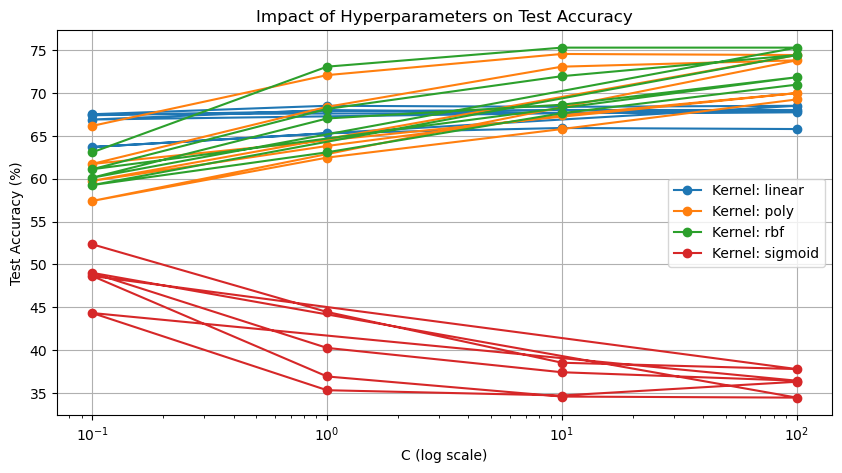

In [99]:
from time import time  # To measure time

# Hyperparameters to explore
C_values = [0.1, 1, 10, 100]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
N_values = [32, 64]  # window size
H_values = [8, 16]  # hop size

# Store results
results_full = []

# Iterate over all combinations
for N in N_values:
    for H in H_values:
        print(f"Testing configurations for N={N}, H={H}")
        # Recompute the feature vectors for each combination of N and H
        train_fvector = [compute_feature_vector(row, Fs=360, N=N, H=H) for row in train_list]
        test_fvector = [compute_feature_vector(row, Fs=360, N=N, H=H) for row in test_list]
        
        for kernel in kernels:
            for C in C_values:
                # Measure time
                start_time = time()
                
                # Define and train the model
                svm_model = SVC(C=C, kernel=kernel, random_state=42)
                svm_model.fit(train_fvector, labels_train)
                
                # Evaluate the model on the test set
                test_predictions = svm_model.predict(test_fvector)
                accuracy = accuracy_score(labels_test, test_predictions)
                
                # Calculate total time
                elapsed_time = time() - start_time
                
                # Save results
                results_full.append((N, H, kernel, C, accuracy, elapsed_time))
                print(f"N={N}, H={H}, Kernel={kernel}, C={C}, Test Accuracy={accuracy * 100:.2f}%, Time={elapsed_time:.2f}s")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results_full, columns=["N", "H", "Kernel", "C", "Accuracy", "Time"])

# Show the first rows of the results
print(results_df.head())

# Plot of results (for example, for the best kernel)
plt.figure(figsize=(10, 5))
for kernel in kernels:
    kernel_data = results_df[results_df["Kernel"] == kernel]
    plt.plot(kernel_data["C"], kernel_data["Accuracy"] * 100, label=f"Kernel: {kernel}", marker="o")

plt.xscale("log")
plt.title("Impact of Hyperparameters on Test Accuracy")
plt.xlabel("C (log scale)")
plt.ylabel("Test Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()
